# Data Mining Project

## Reyhaneh Derafshi - 610396098



### Introduction: 
In this project we build a classifier for data stream classification. 
We first preprosses our data. then change our offline data to data stream.

After that we build a classifier which simulate this task by training each arriving sample K times, which is drawn by the binomial distribution. Since we can consider the data stream to be infinite, and knowing that with infinite samples the binomial distribution Binomial(p,N) tends to a Possion(lambda) disterbution, where lambda = Np. Lambda is computed by tracking the total weights of the correctly and misclassified examples.

We train our classifier with 13000 samples, then we make windows each contains 200 samples of data stream.
to maintain most up-to-date classifiers is not a good chance because discarding of earlier trained less accurate classifier may lead to loss of important information. This technique shows the importance of data distribution in the expiration of the old data which avoids overfitting and the concept of conflicting problem.

In each iteration we update our classifier and estimate its functioning. A plot at the end of thic doc indicates this information.



### Code Explaination: 
Adding headers to our csv files, initializing train set and test set

In [5]:
from skmultiflow.data import DataStream
from skmultiflow.lazy import KNNClassifier
from skmultiflow.meta import OnlineBoostingClassifier, OzaBaggingClassifier

import pandas as pd

column_names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]
train_data = pd.read_csv("adult_train.csv", names=column_names)
test_data = pd.read_csv("adult_test.csv", names=column_names)
test_data = test_data.drop(index=0)

In this section we clean the data. we eliminate records that have missing values. Then we normalize the data by
Convert categorical variable into indicator variables. After that we convert out data to data stream.

In [6]:
for column_name in column_names:
    test_data = test_data.drop(test_data[test_data[column_name] == ' ?'].index)
    train_data = train_data.drop(train_data[train_data[column_name] == ' ?'].index)

train_size = train_data.shape[0]

data = pd.get_dummies(pd.concat([train_data, test_data]))

train_data = data[: train_size]
test_data = data[train_size: ]

train_data_stream = DataStream(train_data)
test_data_stream = DataStream(test_data)

making our classifier, Online Boosting ensemble classifier.
Online Boosting is the online version of the boosting ensemble method (AdaBoost).
AdaBoost focuses more on difficult examples. The misclassified examples by the current classifier h_m are given more weights in the training set of the following learner h_m+1.

Parameters:

1. base_estimator: skmultiflow.core.BaseSKMObject or sklearn.BaseEstimator (default=KNNADWINClassifier)
Each member of the ensemble is an instance of the base estimator.

2. n_estimators: int, optional (default=10)
The size of the ensemble, in other words, how many classifiers to train.

After that we train our clf for the first time with 13000 samples. Then we partially fit the model with partial_fit method.

partial_fit(self, X, y[, classes, sample_weight]) : Partially fits the model, based on the X and y matrix.

In [ ]:
clf = OnlineBoostingClassifier(base_estimator=KNNADWINClassifier(n_neighbors=8, max_window_size=2000, leaf_size=30), n_estimators=2)
X, y = train_data_stream.next_sample(13000)
clf = clf.partial_fit(X, y, classes=train_data_stream.target_values)

Here we create out windows. each window contains window_size number of samples. at each iteration we predict class for our window. then we estimate our answer and update chart.

predict(self, X): The predict function will average the predictions from all its learners to find the most likely prediction for the sample matrix X.


In [ ]:
sample_count = 0
corrects = 0
window_size = 200
chart = []
while test_data_stream.has_more_samples():
    X, y = test_data_stream.next_sample(window_size)
    pred = clf.predict(X)
    if pred is not None:
        for j in range(len(pred)):
            if y[j] == pred[j]:
                corrects += 1
    sample_count += len(y)
    chart.append((sample_count, corrects / sample_count))
    clf = clf.partial_fit(X, y)


### output : 
### Learning Rate
Line graph below illustrates our classification functioning.

(200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000, 5200, 5400, 5600, 5800, 6000, 6200, 6400, 6600, 6800, 7000, 7200, 7400, 7600, 7800, 8000, 8200, 8400, 8600, 8800, 9000, 9200, 9400, 9600, 9800, 10000, 10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000, 13200, 13400, 13600, 13800, 14000, 14200, 14400, 14600, 14800, 15000, 15060)


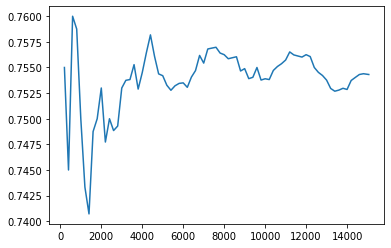

In [12]:
from matplotlib.pyplot import plot

x, y = zip(*chart)
print(x)
plot(x, y)